# "Buzz Aldrin's lifetime mean altitude"
> "I mean obviously we want him to stick around as long as possible, but he is ruining his lifetime average with his longevity ;)"
- toc: false
- branch: master
- badges: true
- comments: true
- categories: [funny, jupyter, xkcd]
- hide: false    

At some point online I saw someone calculate Neil Armstrong's mean lifetime altitude. This seems like a complete Randall Monroe of xkcd.com kind of thing.  But I cannot for the life of me find the link now to put it here.

Anyway I needed a silly toy problem to test the Jupyter notebook to blog post capability of now that I'm using it.  So here I am... extending the Armstrong problem to the case of a still-alive astronaut who's lifetime mean altitude is slowly decreasing.


In [12]:
# hide
# OK, let's fill in Aldrin's altitude history

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# convert nautical miles to kilometers
NMi2Km = 1.852

In [13]:
# per wiki he graduated USMA in 1951 and by 1972 at retirement. I made up the graduation date
# he already had 3500 hours flying time per https://www.nationalaviation.org/our-enshrinees/aldrin-buzz/
# assume 9km average flight altitude (~30kft)
AFstart = pd.Timestamp('May 1, 1951 12:00:00 UTC')
AFend = pd.Timestamp('July 1, 1971 12:00:00 UTC')
AFdur = AFend - AFstart 
AFeffectiveAlt = 9 * pd.Timedelta('3500 hours') / AFdur # spread flight hours over the whole AF career evenly


# Gemini 12 https://en.wikipedia.org/wiki/Gemini_12
# assume mean orbital distance of apogee and perigee
G12start = pd.Timestamp('November 11, 1966, 20:46:33 UTC')
G12end = pd.Timestamp('November 15, 1966, 19:21:04 UTC')
G12meanAlt = np.mean([160,270]) # already in km from wiki

# Apollo 11 https://airandspace.si.edu/sites/default/files/images/5317h.jpg
# https://history.nasa.gov/SP-4029.pdf
# Table 7.11 of https://www.hq.nasa.gov/alsj/a11/a11MIssionReport_1971015566.pdf
MoonMeanDistKm = 384400
A11liftoff = pd.Timestamp('July 16, 1969, 13:32:00 UTC') 
A11EarthOrbitAlt = 100 * NMi2Km # this is rough
A11TLI = A11liftoff + pd.Timedelta('2 hours 50 minutes')
A11MidcourseOut = A11liftoff + pd.Timedelta('26 hours 45 minutes')
A11MidcourseAlt = 109475 * NMi2Km
A11LunarInsert = A11liftoff + pd.Timedelta('75 hours 50 minutes')
A11TEI = A11liftoff + pd.Timedelta('135 hours 24 minutes')
A11splashdown = A11liftoff + pd.Timedelta('195 hours 18 minutes')
# lets check to see if we need to do any detailed interpolation, or if mean is enough...
# print(109475 * NMi2Km / MoonMeanDistKm, (A11MidcourseOut - A11TLI) / (A11LunarInsert - A11MidcourseOut))
# > 0.5274393860561915 0.4872665534804754
# this is close enough to linear interpolation that I'm not going to bother with anything else
# so for the duration of the flight from earth to moon, just fill in 1/2 the lunar distance

baidx = pd.date_range(start='January 20, 1930',end='January 20, 2020',freq='H',tz='UTC')
BuzzAlt = pd.Series(0,index=baidx)
BuzzAlt.loc[AFstart:AFend] = AFeffectiveAlt
BuzzAlt.loc[G12start:G12end] = G12meanAlt
BuzzAlt.loc[A11liftoff:A11TLI] = A11EarthOrbitAlt
BuzzAlt.loc[A11TLI:A11LunarInsert] = MoonMeanDistKm / 2
BuzzAlt.loc[A11LunarInsert:A11TEI] = MoonMeanDistKm
BuzzAlt.loc[A11TEI:A11splashdown] = MoonMeanDistKm / 2

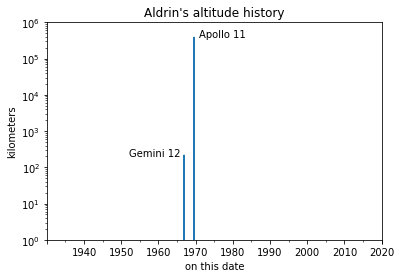

In [14]:
BuzzAlt.plot(logy=True, ylim=(1,1000000));
plt.ylabel('kilometers');
plt.xlabel('on this date');
plt.title('Aldrin\'s altitude history');
plt.annotate('Gemini 12', xy=(G12start,2*10**2), xycoords='data', xytext=(-55,0), textcoords='offset points');
plt.annotate('Apollo 11', xy=(A11liftoff,4*10**5), xycoords='data', xytext=(5,0), textcoords='offset points');




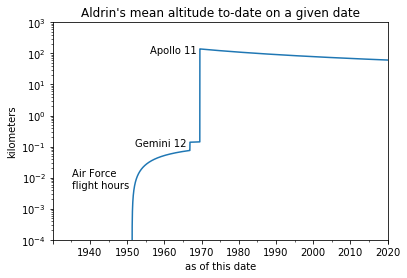

In [15]:

BuzzAlt.expanding().mean().plot(logy=True,ylim=(0.0001,1000));
plt.ylabel('kilometers');
plt.xlabel('as of this date');
plt.title('Aldrin\'s mean altitude to-date on a given date');
plt.annotate('Gemini 12', xy=(G12start,10**-1), xycoords='data', xytext=(-55,0), textcoords='offset points');
plt.annotate('Apollo 11', xy=(A11liftoff,10**2), xycoords='data', xytext=(-50,0), textcoords='offset points');
plt.annotate('Air Force\nflight hours', xy=(AFstart,10**-2), xycoords='data', xytext=(-60,-10), textcoords='offset points');




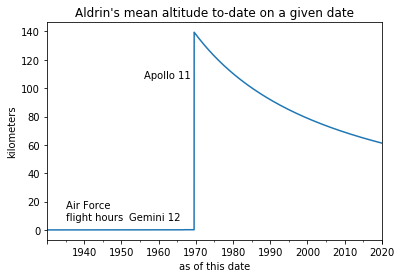

In [16]:
# same thing, but linear y-axis instead of log
BuzzAlt.expanding().mean().plot();
plt.ylabel('kilometers');
plt.xlabel('as of this date');
plt.title('Aldrin\'s mean altitude to-date on a given date');
plt.annotate('Gemini 12', xy=(G12start,10**-1), xycoords='data', xytext=(-55,10), textcoords='offset points');
plt.annotate('Apollo 11', xy=(A11liftoff,10**2), xycoords='data', xytext=(-50,10), textcoords='offset points');
plt.annotate('Air Force\nflight hours', xy=(AFstart,10**-2), xycoords='data', xytext=(-60,10), textcoords='offset points');

